In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge
# evaluate knn on the sonar dataset with k-means ordinal discretization transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")
import time

In [2]:
#heart = pd.read_csv('dataset/heart.csv')
heart= pd.read_csv('dataset/heart_failure_clinical_records_dataset.csv')

In [3]:
dataset = heart

In [4]:
dataset.drop_duplicates(inplace=True)
dataset.reset_index(drop=True, inplace=True)

In [5]:
dataset = pd.get_dummies(dataset ,drop_first=True)

In [6]:
dataset

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [47]:
len(dataset)

299

In [7]:
X = dataset.iloc[:, 0:-1].values

y = dataset.iloc[:, -1].values

In [8]:
#Standerdize
def standardise(X):
    scaler = StandardScaler()
    scaler.fit(X)
    scaled_features = scaler.transform(X) # centering and scaling
    return(scaled_features)

## Train the Support Vector Classifier

In [9]:
def calculate_model(param,X,y):
    
    recall_list_10 = []
    precision_list_10 = []
    specificity_10 = []
    f1_list_10 = []
    accuracy_10 = []
    cpu_10 = []
    roc_10 = []
    

    kfold = KFold(n_splits=10, shuffle=True)
    for i in range(30):
        recall_list = []
        precision_list = []
        specificity = []
        f1_list = []
        accuracy = []
        cpu = []
        roc_list = []
        



        for train_ix, test_ix in kfold.split(X, y):




            X_train , X_test = X[train_ix],X[test_ix]
            y_train , y_test = y[train_ix] , y[test_ix]
            
            t0= time.time()
            if (param == 0):
                model = LogisticRegression()
                
            else:
                model = LogisticRegression(C=param['C'], penalty = param['penalty'])

          

            model.fit(X_train,y_train)
            predictions = model.predict(X_test)
            probs = model.predict_proba(X_test)
            probs = probs[:, 1]
            t1 = time.time() - t0
                        #print("Time elapsed: ", t1) # CPU seconds elapsed (floating point)
            cm = confusion_matrix(y_test,predictions)
            f1_list.append(f1_score(y_test, predictions, average="weighted")*100)

            recall_list.append(recall_score(y_test, predictions, average="weighted")*100)
            precision_list.append(precision_score(y_test, predictions, average="weighted")*100)
            specificity1 = cm[1,1]/(cm[0,1]+cm[1,1])
            if not np.isnan(specificity1):
                specificity.append( (cm[1,1]/(cm[0,1]+cm[1,1]))*100)
            accuracy.append(accuracy_score(y_test, predictions)*100)
            roc_list.append(roc_auc_score(y_test, probs)*100)
            cpu.append(t1)

        precision_list_10.append(sum(precision_list)/10)
        specificity_10.append(sum(specificity)/len(specificity))
        f1_list_10.append(sum(f1_list)/10)
        accuracy_10.append(sum(accuracy)/10)
        recall_list_10.append(sum(recall_list)/10)
        roc_10.append(sum(roc_list)/10)
        cpu_10.append(sum(cpu)/10)



   
    accu = sum(accuracy_10)/30
    pre = sum(precision_list_10)/30
    spec = sum(specificity_10)/30
    rec =  sum(recall_list_10)/30
    f1 =  sum(f1_list_10)/30
    roc = sum(roc_10)/30
    cpu = sum(cpu_10)/30
    return([accu,pre,spec,rec,f1,roc,cpu])



## Grid serach 

In [10]:
from sklearn.model_selection import GridSearchCV
def grid_search():
    
    logreg =LogisticRegression()
    grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

    grid = GridSearchCV(logreg,param_grid=grid_values )
    grid.fit(X_train,y_train)
    grid.best_params_
    return(grid.best_params_)


In [11]:
dict_LG = {}

## First Model without preprocessing 

In [80]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

#from collections import defaultdict
scaled_features = standardise(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)

param = 0
X=scaled_features
result = calculate_model(param,X,y)
    
dict_LG['LG'] = result
dict_LG


{'LG': [82.79808429118773,
  83.56763537748697,
  76.49280071780072,
  82.79808429118773,
  82.47007099296802,
  87.03085619117657,
  0.0015817729632059728],
 'Hypertuned': [82.46436781609194,
  83.27047964391568,
  78.40635198135199,
  82.46436781609194,
  81.75882142659529,
  87.4699969666988,
  0.0016316517194112144],
 'Pca': [80.81839080459768,
  81.56138392513184,
  75.02638108079283,
  80.81839080459768,
  80.12807393082458,
  85.07621210804164,
  0.0017699702580769858],
 'FImp': [83.57662835249043,
  84.2988895521552,
  78.2182807932808,
  83.57662835249043,
  83.2288302321236,
  87.98250825512973,
  0.002408388455708822],
 'Permutations': [83.42030651340994,
  84.21386637327767,
  77.87920641450052,
  83.42030651340994,
  83.07870422289699,
  88.16325562656934,
  0.0015162150065104163],
 'SFS': [82.61494252873565,
  83.38245691154158,
  77.54145576645577,
  82.61494252873565,
  82.12712550385633,
  87.02138133319536,
  0.0012319246927897137],
 'SBS': [83.78965517241377,
  84.68

## Hypertune model using grid search

In [81]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)

param = grid_search()

X=scaled_features
result = calculate_model(param,X,y)
dict_LG['Hypertuned'] = result
dict_LG

{'LG': [82.79808429118773,
  83.56763537748697,
  76.49280071780072,
  82.79808429118773,
  82.47007099296802,
  87.03085619117657,
  0.0015817729632059728],
 'Hypertuned': [82.47164750957855,
  83.20357822509025,
  78.64881969881971,
  82.47164750957855,
  81.77350234904853,
  87.31214550339632,
  0.0011795075734456378],
 'Pca': [80.81839080459768,
  81.56138392513184,
  75.02638108079283,
  80.81839080459768,
  80.12807393082458,
  85.07621210804164,
  0.0017699702580769858],
 'FImp': [83.57662835249043,
  84.2988895521552,
  78.2182807932808,
  83.57662835249043,
  83.2288302321236,
  87.98250825512973,
  0.002408388455708822],
 'Permutations': [83.42030651340994,
  84.21386637327767,
  77.87920641450052,
  83.42030651340994,
  83.07870422289699,
  88.16325562656934,
  0.0015162150065104163],
 'SFS': [82.61494252873565,
  83.38245691154158,
  77.54145576645577,
  82.61494252873565,
  82.12712550385633,
  87.02138133319536,
  0.0012319246927897137],
 'SBS': [83.78965517241377,
  84.6

## PCA

In [55]:
from sklearn.decomposition import PCA
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)
pca = PCA(n_components = 4)
pca.fit(scaled_features)
x_pca = pca.transform(scaled_features)

In [56]:
pca.explained_variance_ratio_

array([0.13858049, 0.13159129, 0.10567855, 0.09299485])

In [57]:
df_comp = pd.DataFrame(pca.components_,columns=dataset.iloc[:, 0:-1].columns)

In [58]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

<AxesSubplot:>

In [59]:
X = x_pca
y = dataset.iloc[:, -1].values
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=101)
param = grid_search()
print(param)
result = calculate_model(param,X,y)
result
dict_LG['Pca'] = result
dict_LG

{'C': 1, 'penalty': 'l2'}


{'LG': [82.82835249042144,
  83.60089992620793,
  76.7763764013764,
  82.82835249042144,
  82.54377846486756,
  86.97875241683867,
  0.00178246815999349],
 'Hypertuned': [82.483908045977,
  83.33987669401135,
  78.76489436489437,
  82.483908045977,
  81.82831915573527,
  87.43847311654417,
  0.0012650243441263836],
 'Pca': [80.81839080459768,
  81.56138392513184,
  75.02638108079283,
  80.81839080459768,
  80.12807393082458,
  85.07621210804164,
  0.0017699702580769858]}

## Feature Importance

In [60]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)

X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)
features_names = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine',
      'serum_sodium','sex','smoking', 'time']
svm = LogisticRegression()
svm.fit(X_train, y_train)
f_importances(abs(svm.coef_[0]), features_names, top=10)


In [61]:

X = dataset[['time', 'serum_creatinine','ejection_fraction','age','sex','serum_sodium']].values

y = dataset.iloc[:, -1].values
scaled_features = standardise(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)

param = grid_search()
#print(param)
X=scaled_features
result = calculate_model(param,X,y)
result
dict_LG['FImp'] = result
dict_LG

{'LG': [82.82835249042144,
  83.60089992620793,
  76.7763764013764,
  82.82835249042144,
  82.54377846486756,
  86.97875241683867,
  0.00178246815999349],
 'Hypertuned': [82.483908045977,
  83.33987669401135,
  78.76489436489437,
  82.483908045977,
  81.82831915573527,
  87.43847311654417,
  0.0012650243441263836],
 'Pca': [80.81839080459768,
  81.56138392513184,
  75.02638108079283,
  80.81839080459768,
  80.12807393082458,
  85.07621210804164,
  0.0017699702580769858],
 'FImp': [83.57662835249043,
  84.2988895521552,
  78.2182807932808,
  83.57662835249043,
  83.2288302321236,
  87.98250825512973,
  0.002408388455708822]}

## Permutation Importance


In [62]:
#pip install eli5

In [63]:
import eli5
from eli5.sklearn import PermutationImportance
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)
svc =  LogisticRegression()
svc.fit(X_train, y_train) 
# create permutation importance object using model
# and fit on test set
perm = PermutationImportance(svc, random_state=1).fit(X_test, y_test)
  
# display weights using PermutationImportance object
eli5.show_weights(perm, feature_names =['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine',
      'serum_sodium','sex','smoking', 'time'])

In [64]:


X = dataset[['time', 'serum_creatinine','ejection_fraction','serum_sodium','age','sex']].values

y = dataset.iloc[:, -1].values
scaled_features = standardise(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)

param = grid_search()
#print(param)
X=scaled_features
result = calculate_model(param,X,y)
dict_LG['Permutations'] = result
dict_LG


{'LG': [82.82835249042144,
  83.60089992620793,
  76.7763764013764,
  82.82835249042144,
  82.54377846486756,
  86.97875241683867,
  0.00178246815999349],
 'Hypertuned': [82.483908045977,
  83.33987669401135,
  78.76489436489437,
  82.483908045977,
  81.82831915573527,
  87.43847311654417,
  0.0012650243441263836],
 'Pca': [80.81839080459768,
  81.56138392513184,
  75.02638108079283,
  80.81839080459768,
  80.12807393082458,
  85.07621210804164,
  0.0017699702580769858],
 'FImp': [83.57662835249043,
  84.2988895521552,
  78.2182807932808,
  83.57662835249043,
  83.2288302321236,
  87.98250825512973,
  0.002408388455708822],
 'Permutations': [83.42030651340994,
  84.21386637327767,
  77.87920641450052,
  83.42030651340994,
  83.07870422289699,
  88.16325562656934,
  0.0015162150065104163]}

## Sequential Forward Selection

In [65]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)

X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)
svc =  LogisticRegression()
sfs = SFS(svc, 
          k_features=6, 
          forward=True, 
          floating=False, 
          scoring='accuracy',

          n_jobs=-1)
sfs = sfs.fit(X_train, y_train)

print('\nSequential Forward Selection (k=3):')
print(sfs.k_feature_idx_)
print(sfs.k_feature_names_)
print('CV Score:')
print(sfs.k_score_)


Sequential Forward Selection (k=3):
(1, 4, 5, 7, 8, 11)
('1', '4', '5', '7', '8', '11')
CV Score:
0.8536347517730498


In [66]:
feat_cols = list(sfs.k_feature_idx_)
feat_cols
X_train = X_train[:, feat_cols]
X_test = X_test[:, feat_cols]
X=scaled_features
X = X[:,feat_cols]
param =  grid_search()
result = calculate_model(param,X,y)
dict_LG['SFS'] = result


In [67]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)

X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)
svc =  LogisticRegression()
sfs = SFS(svc, 
          k_features=6, 
          forward=False, 
          floating=False, 
          scoring='accuracy',

          n_jobs=-1)
sfs = sfs.fit(X_train, y_train)

print('\nSequential Forward Selection (k=3):')
print(sfs.k_feature_idx_)
print(sfs.k_feature_names_)
print('CV Score:')
print(sfs.k_score_)


Sequential Forward Selection (k=3):
(0, 2, 4, 8, 9, 11)
('0', '2', '4', '8', '9', '11')
CV Score:
0.8534574468085105


In [68]:
feat_cols = list(sfs.k_feature_idx_)
feat_cols
X_train = X_train[:, feat_cols]
X_test = X_test[:, feat_cols]
X=scaled_features
X = X[:,feat_cols]
param =  grid_search()
result = calculate_model(param,X,y)
dict_LG['SBS'] = result


## RFE


In [69]:
from sklearn.feature_selection import RFE
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)

X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)
model=LogisticRegression()
rfe = RFE(model, n_features_to_select=8, step=1, verbose=2)
rfe = rfe.fit(X_train, y_train)
rfe.support_

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.


array([ True, False,  True, False,  True,  True, False,  True,  True,
        True, False,  True])

'age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine',
      'serum_sodium','sex','smoking', 'time'

In [70]:
 
X = dataset[['age','creatinine_phosphokinase','ejection_fraction','high_blood_pressure','serum_creatinine','serum_sodium','sex','time']].values

y = dataset.iloc[:, -1].values
scaled_features = standardise(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)

param = grid_search()
#print(param)
X=scaled_features
result = calculate_model(param,X,y)
dict_LG['RFE'] = result
dict_LG



{'LG': [82.82835249042144,
  83.60089992620793,
  76.7763764013764,
  82.82835249042144,
  82.54377846486756,
  86.97875241683867,
  0.00178246815999349],
 'Hypertuned': [82.483908045977,
  83.33987669401135,
  78.76489436489437,
  82.483908045977,
  81.82831915573527,
  87.43847311654417,
  0.0012650243441263836],
 'Pca': [80.81839080459768,
  81.56138392513184,
  75.02638108079283,
  80.81839080459768,
  80.12807393082458,
  85.07621210804164,
  0.0017699702580769858],
 'FImp': [83.57662835249043,
  84.2988895521552,
  78.2182807932808,
  83.57662835249043,
  83.2288302321236,
  87.98250825512973,
  0.002408388455708822],
 'Permutations': [83.42030651340994,
  84.21386637327767,
  77.87920641450052,
  83.42030651340994,
  83.07870422289699,
  88.16325562656934,
  0.0015162150065104163],
 'SFS': [82.61494252873565,
  83.38245691154158,
  77.54145576645577,
  82.61494252873565,
  82.12712550385633,
  87.02138133319536,
  0.0012319246927897137],
 'SBS': [83.78965517241377,
  84.68454565

## K-means

In [12]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)


model = KMeans()
#visualizer = KElbowVisualizer(model, k=(1,12)).fit(scaled_features)
#visualizer.show()

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,init='k-means++', random_state=0).fit(scaled_features)

In [14]:
y= kmeans.predict(scaled_features)

In [15]:
df = pd.DataFrame(scaled_features , columns= ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine',
      'serum_sodium','sex','smoking', 'time'])
#df['Cluster'] = y
df.head()

age   anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  1.192945 -0.871105                  0.000166 -0.847579          -1.530560   
1 -0.491279 -0.871105                  7.514640 -0.847579          -0.007077   
2  0.350833 -0.871105                 -0.449939 -0.847579          -1.530560   
3 -0.912335  1.147968                 -0.486071 -0.847579          -1.530560   
4  0.350833  1.147968                 -0.435486  1.179830          -1.530560   

   high_blood_pressure     platelets  serum_creatinine  serum_sodium  \
0             1.359272  1.681648e-02          0.490057     -1.504036   
1            -0.735688  7.535660e-09         -0.284552     -0.141976   
2            -0.735688 -1.038073e+00         -0.090900     -1.731046   
3            -0.735688 -5.464741e-01          0.490057      0.085034   
4            -0.735688  6.517986e-01          1.264666     -4.682176   

        sex   smoking      time  
0  0.735688 -0.687682 -1.629502  
1  0.735688 -0.687682 -1.603691  
2  0.735688  1.454161 -1.590785  
3  0.735688 -0.687682 -1.590785  
4 -1.359272 -0.687682 -1.577879

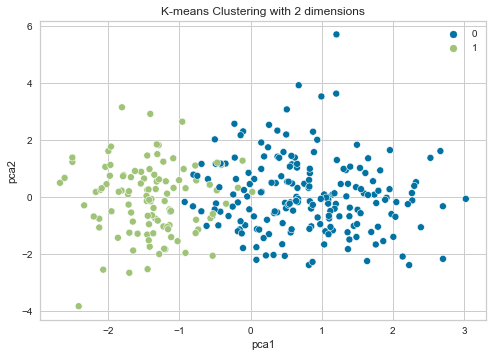

In [75]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(scaled_features)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=y, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [110]:
scaled_features = standardise(X)
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.2, random_state=401
                                                   )
param =grid_search()
X=scaled_features
result = calculate_model(param,X,y)
result
dict_LG['kmeans'] = result

In [16]:
import shap


In [17]:
import xgboost
model = xgboost.XGBClassifier().fit(df, y)

# compute SHAP values
explainer = shap.Explainer(model, df)
shap_values = explainer(df)

[22:14:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


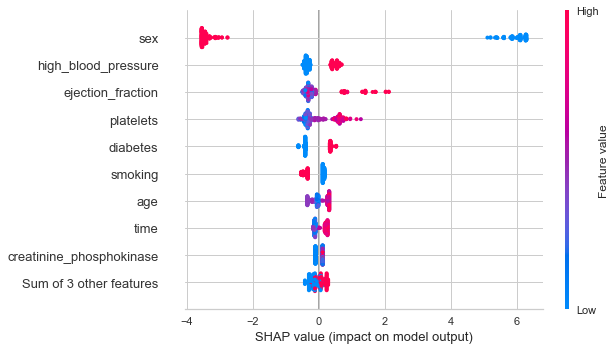

In [18]:
shap.plots.beeswarm(shap_values)

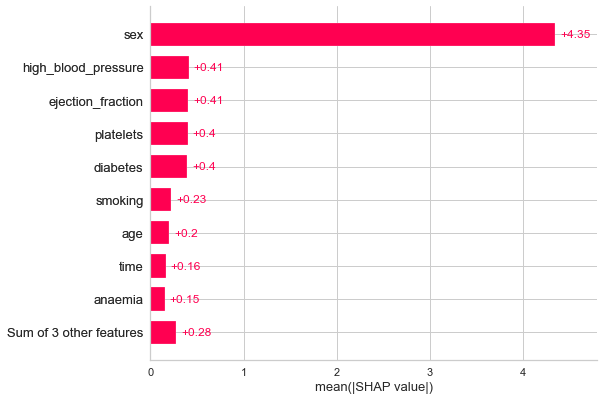

In [19]:
shap.plots.bar(shap_values)

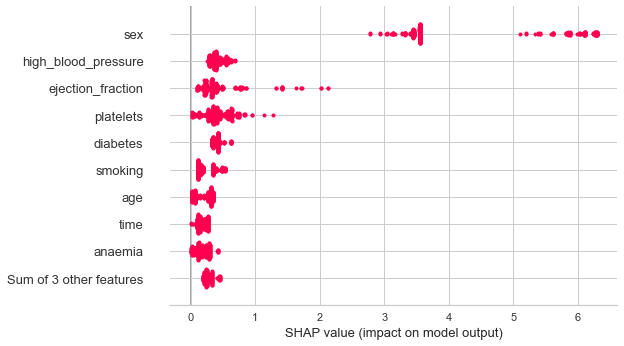

In [114]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

In [115]:
X = dataset[['sex','anaemia','diabetes','high_blood_pressure','ejection_fraction','platelets',
      'smoking','age','time']].values
scaled_features = standardise(X)
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.2, random_state=401
                                                   )
param =grid_search()
#print(param)
X=scaled_features
result = calculate_model(param,X,y)
result
dict_LG['kmeans+Shap'] = result
result

[99.3306513409962,
 99.36954725487858,
 100.0,
 99.3306513409962,
 99.32180110658955,
 100.0,
 0.0016806300481160483]

In [116]:
df_dict = pd.DataFrame.from_dict(dict_LG,orient='index', columns= ['Accuracy','Precision','Specificity','Recall','F1_score','Roc','CPU_time'])
df_dict

Accuracy  Precision  Specificity     Recall   F1_score  \
LG            82.798084  83.567635    76.492801  82.798084  82.470071   
Hypertuned    82.471648  83.203578    78.648820  82.471648  81.773502   
Pca           80.818391  81.561384    75.026381  80.818391  80.128074   
FImp          83.576628  84.298890    78.218281  83.576628  83.228830   
Permutations  83.420307  84.213866    77.879206  83.420307  83.078704   
SFS           82.614943  83.382457    77.541456  82.614943  82.127126   
SBS           83.789655  84.684546    78.464246  83.789655  83.395745   
RFE           83.376628  84.197674    80.244696  83.376628  82.772163   
kmeans        99.330268  99.370148   100.000000  99.330268  99.321072   
kmeans+Shap   99.330651  99.369547   100.000000  99.330651  99.321801   

                     Roc  CPU_time  
LG             87.030856  0.001582  
Hypertuned     87.312146  0.001180  
Pca            85.076212  0.001770  
FImp           87.982508  0.002408  
Permutations   88.163256  0.001516  
SFS            87.021381  0.001232  
SBS            86.745743  0.002167  
RFE            87.981427  0.001064  
kmeans        100.000000  0.001120  
kmeans+Shap   100.000000  0.001681

In [117]:

#df_dict.to_excel('xl_result/LG_heart2_30.xlsx')

In [3]:
#df_dict =  pd.read_excel('xl_result/LG_heart2_30.xlsx',index_col=0)

In [4]:
# Adding Number of features
df_dict['no_of_features'] = [12,12,'4 components',6,6,6,6,8,12,9]
df_dict

Accuracy  Precision  Specificity     Recall   F1_score  \
LG            82.798084  83.567635    76.492801  82.798084  82.470071   
Hypertuned    82.471648  83.203578    78.648820  82.471648  81.773502   
Pca           80.818391  81.561384    75.026381  80.818391  80.128074   
FImp          83.576628  84.298890    78.218281  83.576628  83.228830   
Permutations  83.420307  84.213866    77.879206  83.420307  83.078704   
SFS           82.614943  83.382457    77.541456  82.614943  82.127126   
SBS           83.789655  84.684546    78.464246  83.789655  83.395745   
RFE           83.376628  84.197674    80.244696  83.376628  82.772163   
kmeans        99.330268  99.370148   100.000000  99.330268  99.321072   
kmeans+Shap   99.330651  99.369547   100.000000  99.330651  99.321801   

                     Roc  CPU_time no_of_features  
LG             87.030856  0.001582             12  
Hypertuned     87.312146  0.001180             12  
Pca            85.076212  0.001770   4 components  
FImp           87.982508  0.002408              6  
Permutations   88.163256  0.001516              6  
SFS            87.021381  0.001232              6  
SBS            86.745743  0.002167              6  
RFE            87.981427  0.001064              8  
kmeans        100.000000  0.001120             12  
kmeans+Shap   100.000000  0.001681              9